# A first look at ELIXIR tools in Bio.Tools registry

## Load data into a pandas DataFrame via json

In [485]:

%matplotlib inline
import requests
import json
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import pylab

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
pylab.rcParams['figure.figsize'] = 15,5
matplotlib.rcParams.update({'font.size': 14})

### Convert json  into a pandas dataframe

This will generate some complicated datastructures for nested attributes but these are dealt with when (if) analysed


In [487]:
%time r = requests.get('https://bio.tools/api/tool')
print ("Response Status:", r.status_code)
r.headers['content-type']
bt=json.loads(r.text)
bioTools=pd.DataFrame(bt)

CPU times: user 70.7 ms, sys: 46.7 ms, total: 117 ms
Wall time: 8.46 s
Response Status: 200


### Check content interactively

In [35]:
bioTools

,accessibility,additionDate,affiliation,canonicalID,collection,contact,cost,credits,description,docs,...,maturity,mirror,name,platform,publications,resourceType,sourceRegistry,topic,uses,version
0,NaN,2015-01-21T13:29:09Z,CBS,NaN,NaN,"[{'contactEmail': 'mniel@cbs.dtu.dk', 'contact...",Free with restrictions,"{'creditsDeveloper': ['Morten Nielsen'], 'cred...",Prediction of the location of linear B-cell ep...,{'docsDownload': 'http://www.cbs.dtu.dk/servic...,...,Early,NaN,BepiPred,"[Linux, Linux]",{'publicationsPrimaryID': 'doi:10.1186/1745-75...,[Tool],NaN,"[{'term': 'Protein binding sites', 'uri': 'htt...",NaN,1.0
1,NaN,2015-01-21T13:29:12Z,CBS,NaN,NaN,"[{'contactEmail': 'lund@cbs.dtu.dk', 'contactN...",Free with restrictions,"{'creditsDeveloper': ['Jan Gorodkin'], 'credit...",Prediction of distance constraints between ami...,{'docsHome': 'http://www.cbs.dtu.dk/services/d...,...,Early,NaN,DistanceP,[Linux],{'publicationsPrimaryID': '10786291'},[Tool],http://cbs.dtu.dk/services,"[{'term': 'Protein structure prediction', 'uri...",NaN,1.0
2,NaN,2015-01-21T13:29:13Z,CBS,NaN,NaN,"[{'contactEmail': 'thomas@cbs.dtu.dk', 'contac...",Free with restrictions,{'creditsInstitution': ['CBS']},Automated data analysis from gene expression e...,NaN,...,Early,NaN,GenePublisher,[Linux],{'publicationsPrimaryID': 'doi:10.1093/nar/gkg...,[Tool],http://cbs.dtu.dk/services,"[{'term': 'Data analysis', 'uri': 'http://edam...",NaN,1.03
3,NaN,2015-01-21T13:29:13Z,CBS,NaN,NaN,"[{'contactEmail': 'rapacki@cbs.dtu.dk', 'conta...",Free with restrictions,{'creditsInstitution': ['CBS']},Prediction of vertebrate and C. elegans genes,NaN,...,Early,NaN,HMMgene,"[Linux, Linux]","{'publicationsOtherID': ['12783628'], 'publica...",[Tool],http://cbs.dtu.dk/services,"[{'term': 'Sequence sites, features and motifs...",NaN,1.1
4,NaN,2015-01-21T13:29:13Z,CBS,NaN,NaN,"[{'contactEmail': 'rapacki@cbs.dtu.dk', 'conta...",Free with restrictions,{'creditsInstitution': ['CBS']},Prediction of interacting protein residues by ...,NaN,...,Early,NaN,InterMap3D,[Linux],{'publicationsPrimaryID': '19528088'},[Tool],http://cbs.dtu.dk/services,"[{'term': 'Molecular interactions, pathways an...",NaN,1.3
5,NaN,2015-01-21T13:29:15Z,CBS,NaN,NaN,"[{'contactEmail': 'mette@cbs.dtu.dk', 'contact...",Free with restrictions,{'creditsInstitution': ['CBS']},Multi Locus Sequence Typing (MLST) from an ass...,NaN,...,Early,NaN,MLST,[Linux],{'publicationsPrimaryID': '22238442'},[Tool],http://cbs.dtu.dk/services,"[{'term': 'Immunoproteins, genes and antigens'...",NaN,1.7
6,NaN,2015-01-21T13:29:15Z,CBS,NaN,NaN,"[{'contactEmail': 'hnielsen@cbs.dtu.dk', 'cont...",Free with restrictions,{'creditsInstitution': ['CBS']},Prediction of substrates of N-acetyltransferas...,NaN,...,Early,NaN,NetAcet,[Linux],{'publicationsPrimaryID': '15539450'},[Tool],http://cbs.dtu.dk/services,"[{'term': 'Sequence analysis', 'uri': 'http://...",NaN,1.0
7,NaN,2015-01-21T13:29:16Z,CBS,NaN,NaN,"[{'contactEmail': 'rapacki@cbs.dtu.dk', 'conta...",Free with restrictions,{'creditsInstitution': ['CBS']},Predictions of splice sites in Aspergillus fum...,NaN,...,Early,NaN,NetAspGene,[Linux],{'publicationsPrimaryID': '18948220'},[Tool],http://cbs.dtu.dk/services,"[{'term': 'Sequence analysis', 'uri': 'http://...",NaN,1.0
8,NaN,2015-01-21T13:29:16Z,CBS,NaN,NaN,"[{'contactEmail': 'rapacki@cbs.dtu.dk', 'conta...",Free with restrictions,{'creditsInstitution': ['CBS']},Neural network predictions of C-mannosylation ...,NaN,...,Early,NaN,NetCGlyc,[Linux],{'publicationsPrimaryID': '17494086'},[Tool],http://cbs.dtu.dk/services,"[{'term': 'Sequence sites, features and motifs...",NaN,1.0
9,NaN,2015-01-21T13:29:16Z,CBS,NaN,NaN,"[{'contactEmail': 'mniel@cbs.dtu.dk', 'contact...",Free with restrictions,{'creditsInstitution': ['CBS']},Neural network predictions for cleavage sites ...,NaN,...,Early,NaN,NetChop,"[Linux, Linux]",{'publicationsPrimaryID': '15744535'},[Tool],http://cbs.dtu.dk/services,"[{'term': 'Protein cleavage sites', 'uri': 'ht...",NaN,3.1


Current size of the registry , Number of top-level attributes

In [488]:
bioTools.shape

(2321, 27)

### Filter out the ELIXIR tools using heuristics
Next try out the selection tools for the DataFrame to select the ones that either have "ELIXIR" or "de.NBI" in collections attribute or, alternatively, have the "elixirInfo" attribute 
These are added to separate dataframes that are later combined.

Use binary selection vector to filter out elements with the 'elixirInfo' flag set

In [489]:
elixirInfo=bioTools[bioTools.elixirInfo.notnull()]
elixirInfo.shape

(26, 27)

For the other ELIXIR tools - which forms part and are annotated as 'collections' use regex
Include Germany for completeness

In [490]:
pat=re.compile(r'ELIXIR|de\.NBI')

Drop the tools without any collection annotation and then select if they match the regex

In [491]:
ct=bioTools[bioTools['collection'].notnull()]
elixirCol=ct[[True if (pat.search(' '.join(x))) else False for x in ct['collection']]]
elixirCol.shape

(105, 27)

In [492]:
elixirTools=pd.concat([elixirInfo,elixirCol])
elixirTools.shape

(131, 27)

In [232]:
elixirTools

,accessibility,additionDate,affiliation,canonicalID,collection,contact,cost,credits,description,docs,elixirInfo,function,homepage,id,interface,language,license,maturity,mirror,name,platform,publications,resourceType,sourceRegistry,topic,uses,version
875,NaN,2015-05-20T11:32:54Z,vib-kuleuven.be,NaN,NaN,"[{'contactRole': ['Scientific'], 'contactEmail...",NaN,"{'creditsDeveloper': ['Karoline Faust'], 'cred...",CoNet is a tool that detects significant non-r...,{'docsDownload': 'http://psbweb05.psb.ugent.be...,{'elixirNode': 'Belgium'},[{'functionDescription': 'CoNet is a similarit...,http://www.raeslab.org/software/conet.html,38932,[{'interfaceDocs': 'http://psbweb05.psb.ugent....,[Java],Missing,Stable,NaN,CoNet,"[Windows, Linux, Mac, Linux]","{'publicationsOtherID': ['22796884'], 'publica...",[Tool],NaN,"[{'term': 'Systems biology', 'uri': 'http://ed...","[{'usesName': 'Cytoscape', 'usesHomepage': 'ht...",1
879,NaN,2015-06-11T13:36:26Z,EMBL-EBI Databases,NaN,NaN,[{'contactURL': 'http://www.ebi.ac.uk/support/...,NaN,NaN,"Protein families, domains, regions, repeats an...",NaN,"{'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...",[{'input': [{'dataType': {'term': 'InterPro ac...,http://www.ebi.ac.uk/interpro/,38945,[{'interfaceType': 'Web UI'}],NaN,Missing,Missing,NaN,InterPro,Missing,{'publicationsPrimaryID': 'None'},[Database],NaN,"[{'term': 'Protein families', 'uri': 'http://e...",NaN,1
880,NaN,2015-06-11T13:36:26Z,EMBL-EBI Databases,NaN,NaN,[{'contactURL': 'http://geneontology.org/form/...,NaN,NaN,Controlled vocabulary of terms for describing ...,NaN,"{'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...",[{'input': [{'dataType': {'term': 'GO concept ...,http://www.geneontology.org/,38946,[{'interfaceType': 'Web UI'}],NaN,Missing,Missing,NaN,Gene ontology,Missing,{'publicationsPrimaryID': 'None'},[Database],NaN,"[{'term': 'Ontology and terminology', 'uri': '...",NaN,1
881,NaN,2015-06-11T13:36:27Z,EMBL-EBI Databases,NaN,NaN,[{'contactEmail': 'pfam-help@ebi.ac.uk'}],NaN,NaN,"Large collection of protein families, each rep...",NaN,"{'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...",[{'input': [{'dataType': {'term': 'Sequence ac...,http://pfam.sanger.ac.uk/,38947,[{'interfaceType': 'Web UI'}],NaN,Missing,Missing,NaN,Pfam protein domain database,Missing,{'publicationsPrimaryID': 'None'},[Database],NaN,"[{'term': 'Topic', 'uri': 'http://edamontology...",NaN,1
882,NaN,2015-06-11T13:36:28Z,EMBL-EBI Databases,NaN,NaN,[{'contactEmail': 'help@uniprot.org'}],NaN,NaN,Part of UniProt project - a non-redundant arch...,NaN,"{'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...",[{'input': [{'dataType': {'term': 'UniParc acc...,http://www.uniprot.org/,38948,[{'interfaceType': 'Web UI'}],NaN,Missing,Missing,NaN,UniProt Archive,Missing,{'publicationsPrimaryID': 'None'},[Database],NaN,"[{'term': 'Sequence analysis', 'uri': 'http://...",NaN,1
883,NaN,2015-06-11T13:36:28Z,EMBL-EBI Databases,NaN,NaN,[{'contactEmail': 'ega-helpdesk@ebi.ac.uk'}],NaN,NaN,A repository for all types of genotype experim...,NaN,"{'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...",[{'input': [{'dataType': {'term': 'EGA accessi...,http://www.ebi.ac.uk/ega/,38949,[{'interfaceType': 'Web UI'}],NaN,Missing,Missing,NaN,European genome-phenome Archive EGA,Missing,{'publicationsPrimaryID': 'None'},[Database],NaN,"[{'term': 'Genotype and phenotype', 'uri': 'ht...",NaN,1
884,NaN,2015-06-11T13:36:29Z,EMBL-EBI Databases,NaN,NaN,[{'contactEmail': 'biomodels-net-support@lists...,NaN,NaN,"A that allows biologists to store, search and ...",NaN,"{'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...",[{'input': [{'dataType': {'term': 'BioModel ID...,http://www.ebi.ac.uk/biomodels-main/,38950,[{'interfaceType': 'Web UI'}],NaN,Missing,Missing,NaN,BioModels database of annotated published models,Missing,{'publicationsPrimaryID': 'None'},[Database],NaN,"[{'term': 'Systems biology', 'uri': 'http://ed...",NaN,1
885,NaN,2015-06-11T13:36:30Z,EMBL-EBI Databases,NaN,NaN,[{'contactEmail': 'help@reactome.org'}],NaN,NaN,

Use count function for overview of attributes

In [493]:
elixirTools.count()

accessibility      89
additionDate      131
affiliation       131
canonicalID         0
collection        106
contact           131
cost               92
credits            70
description       131
docs               72
elixirInfo         27
function          131
homepage          131
id                131
interface         131
language           54
license            35
maturity           84
mirror              8
name              131
platform           54
publications      131
resourceType      131
sourceRegistry      0
topic             131
uses                7
version           131
dtype: int64

#  Analysis of ELIXIR tools in the registry 
Currently not very complete and needs checking against node proposals 

### Most of the tools associated with ELIXIR Nodes don't have the elixirInfo attribute

In [305]:
elixirTools.elixirInfo

875                             {'elixirNode': 'Belgium'}
879     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
880     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
881     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
882     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
883     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
884     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
885     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
886     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
887     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
888     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
889     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
890     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
891     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
892     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
893     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
894     {'elixirNode': 'EMBL-EBI', 'elixirStatus': 'EL...
895     {'elix

In [435]:
eInfo=pd.concat(
    [pd.DataFrame(x,index=[0],columns=x.keys()) if type(x)==type({}) else pd.DataFrame([x],columns=['_ignore_'])
     for x in elixirTools.elixirInfo]
    ,ignore_index=True
)


In [439]:
eInfo['elixirNode'].fillna('Missing', inplace=True)

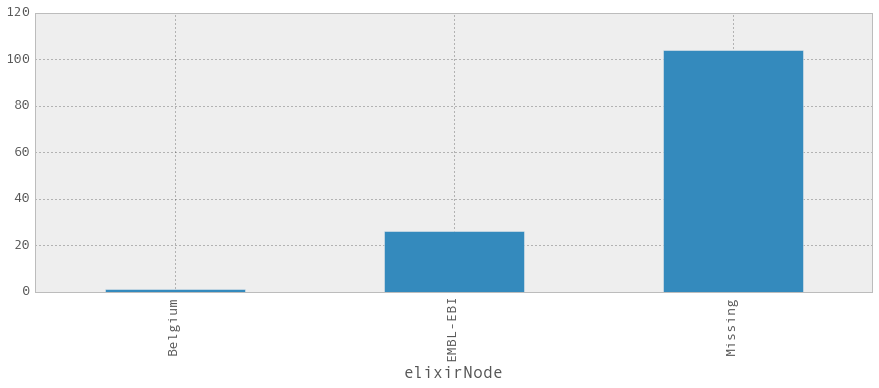

In [442]:
eInfo.groupby('elixirNode').aggregate('size').plot('bar')

In [445]:
eInfo['elixirStatus'].fillna('Missing', inplace=True)

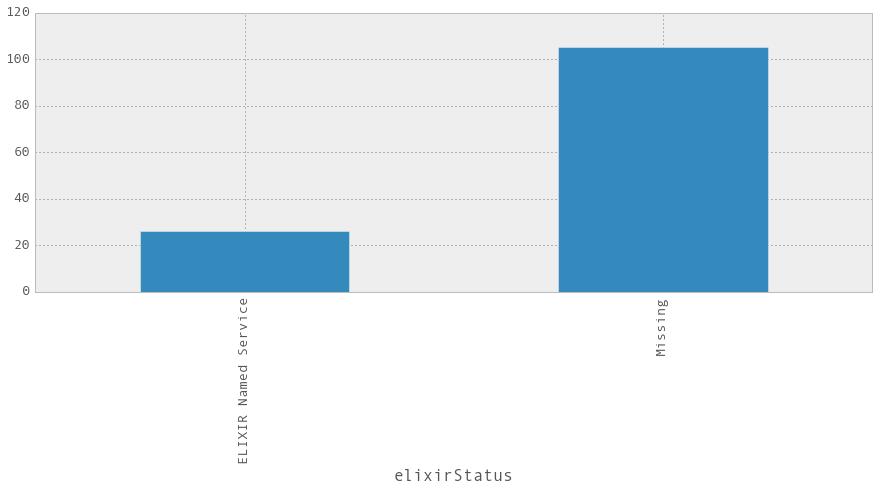

In [446]:
eInfo.groupby('elixirStatus').aggregate('size').plot('bar')

### EDAM annotations of the ELIXIR Tools

In [582]:
topic=pd.concat(
    [pd.DataFrame(x[0],index=[0],columns=x[0].keys()) for x in elixirTools.topic ]
    ,ignore_index=True
)

In [584]:
print(topic.groupby('term').aggregate('size'))

term
Biodiversity                                      2
Bioinformatics                                   23
Biological imaging                                1
Cheminformatics                                   1
Comparative genomics                              2
Computational chemistry                           6
Computer programming                              2
DNA                                               1
DNA polymorphism                                  1
Data management                                   1
Data mining                                       1
Enzymes                                           2
Evolutionary biology                              1
Functional genomics                               2
Functional, regulatory and non-coding RNA         1
Gene expression                                   1
Gene families                                     1
Gene regulation                                   1
Genomics                                          2
Genotyp

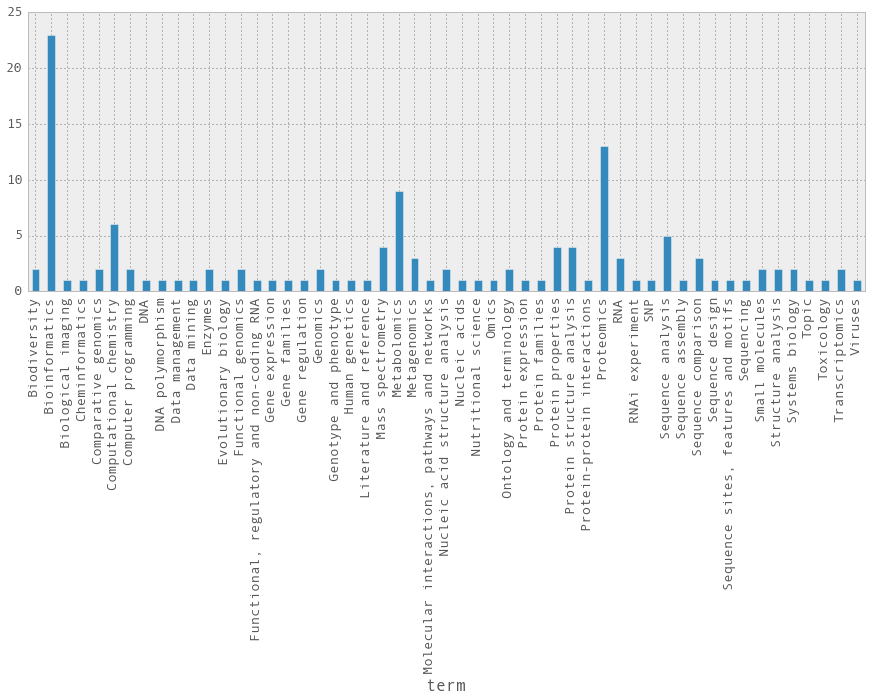

In [585]:
topic.groupby('term').aggregate('size').plot('bar')

ELIXIR tools are annotated at very different levels in the ontology - need to agree on annotation practice for e.g.  gap analysis 

### License information availiable for ELIXIR Tools

In [495]:
elixirTools['license'].fillna('Missing', inplace=True)


license
Apache License 2.0                                        2
BSD 3-Clause License (Revised)                            6
Creative Commons Attribution NonCommercial ShareAlike     1
Creative Commons Attribution Share Alike                  4
GNU General Public License v2                             3
GNU General Public License v3                            10
GNU Lesser General Public License v2.1                    7
MIT License                                               2
Missing                                                  96
dtype: int64


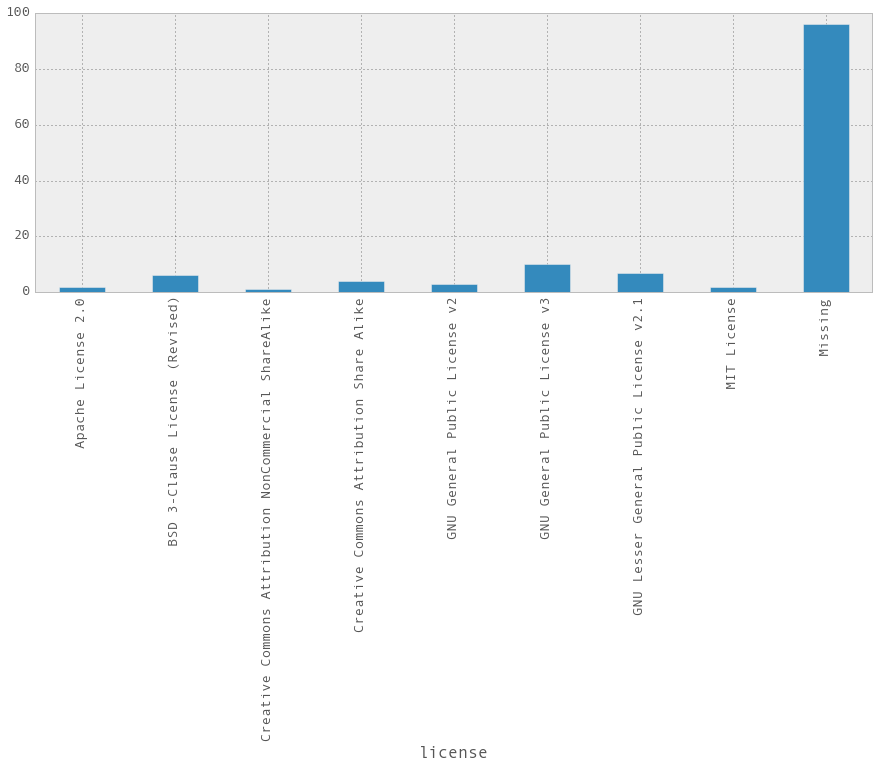

In [496]:
print( elixirTools.groupby('license').aggregate('size'))
elixirTools.groupby('license').aggregate('size').plot('bar')


Most tools associated with ELIXIR Nodes have no information on the  license - but those that have are open source

This is obviously the reasone for  the open source working group

### Life cycle information of ELIXIR Tools

WP3 in EXCELERATE are developing a life-cycle framework. This should be adopted consistently for the ELIXIR Tools

In [497]:
elixirTools['maturity'].fillna('Missing', inplace=True)

maturity
Deprecated     5
Early         10
Missing       47
Stable        69
dtype: int64


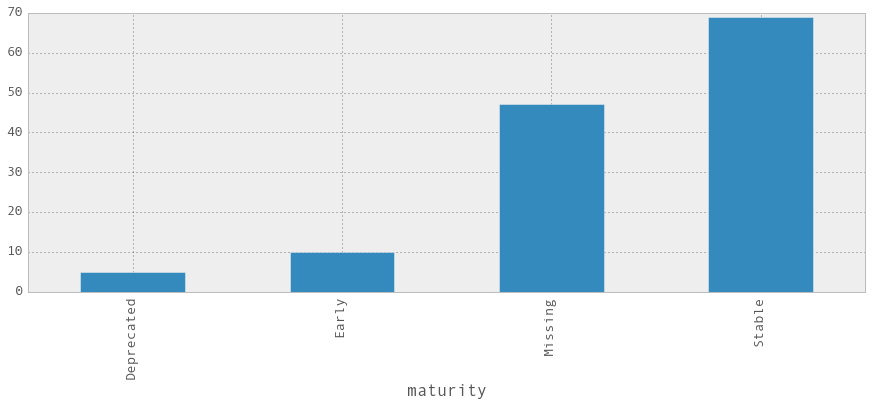

In [498]:
print(elixirTools.groupby('maturity').aggregate('size'))
elixirTools.groupby('maturity').aggregate('size').plot('bar')

Most tools have some level of annotation. There are Deprecated tools associeted with ELIXIR Nodes - 
we need active management of the tools. But this could be an artefact of the heuristics above

### Conditions for tool access 

In [500]:

elixirTools['accessibility'].fillna('Missing', inplace=True)

accessibility
Missing    42
Public     89
dtype: int64


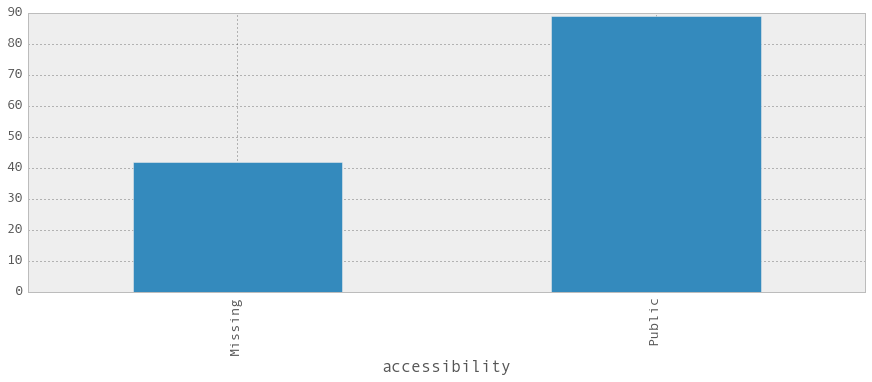

In [501]:
print(elixirTools.groupby('accessibility').aggregate('size'))
elixirTools.groupby('accessibility').aggregate('size').plot('bar')

### Supported platforms for tools

In [581]:
elixirTools.platform

869     [Windows, Linux, Mac, Linux]
873                              NaN
874                              NaN
875                              NaN
876                              NaN
877                              NaN
878                              NaN
879                              NaN
880                              NaN
881                              NaN
882                              NaN
883                              NaN
884                              NaN
885                              NaN
886                              NaN
887                              NaN
888                              NaN
889                              NaN
890                              NaN
891                              NaN
892                              NaN
893                              NaN
894                              NaN
895                              NaN
896                              NaN
1796                             NaN
364                          [Linux]
3

Reshape the list in the attribute to a proper dataframe. Summarise and plot

In [605]:
p=pd.concat(
    [pd.DataFrame(
            dict(zip(x,[1]*len(x))),
            index=[0]
            )
    if type(x)==type([])
    else pd.DataFrame([x],index=[0],columns=['_ignore_']) 
    for x in elixirTools.platform
    ],
    ignore_index=True
)
platforms=p.drop('_ignore_', axis=1)        
platforms

,Linux,Mac,Windows
0,1,1,1
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


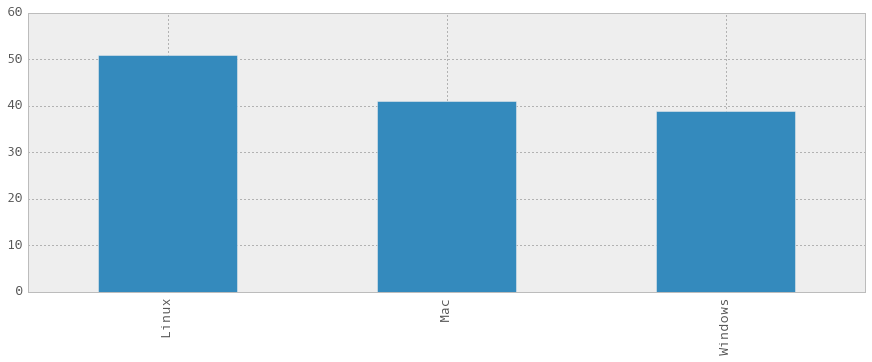

In [547]:
platforms.count().plot('bar')

Reasonably cross platform - but most tools have no platform assignment:

In [563]:
noplat=platforms[platforms.Mac.isnull() & platforms.Windows.isnull()&  platforms.Linux.isnull()]

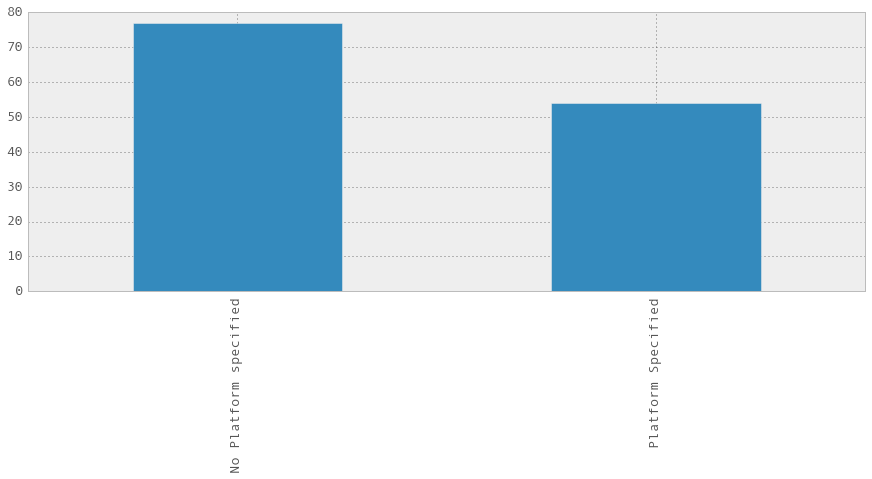

In [580]:
pd.DataFrame({'Platform Specified':platforms.shape[0]-noplat.shape[0], 'No Platform specified':noplat.shape[0]},
             index=[0]).sum().plot('bar')

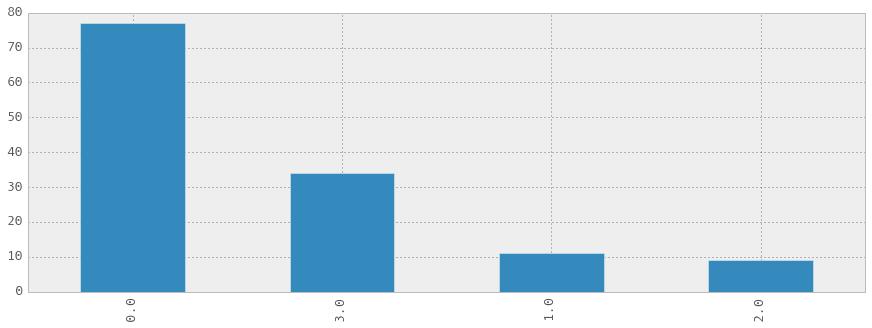

In [598]:
platforms.sum(axis=1).value_counts().plot('bar')

Majority of tools have no platform assignment - but of those that have most are cross-platform

### Resource type? Database or Tool?

In [608]:
p=pd.concat(
    [pd.DataFrame(
            dict(zip(x,[1]*len(x))),
            index=[0]
            )
    if type(x)==type([])
    else pd.DataFrame([x],index=[0],columns=['_ignore_']) 
    for x in elixirTools.resourceType
    ],
    ignore_index=True
)
if '_ignore_' in p.keys():
    resourceType=p.drop('_ignore_', axis=1)
else:
    resourceType=p

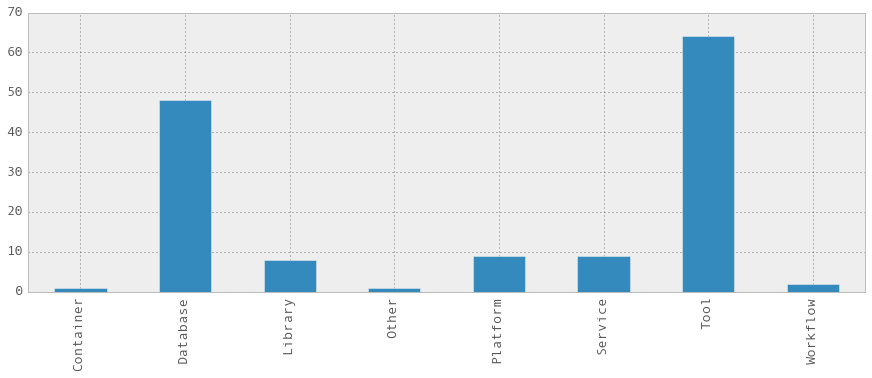

In [637]:
resourceType.count().plot('bar')

This sums to more than 100% - multiple annotations (which is fine of course)

In [224]:
elixirTools.groupby('affiliation').aggregate('size')

affiliation
BiBiServ                   13
BioInfra.Prot              11
ELIXIR-CZ                  28
ELIXIR-ITA-CNR             12
ELIXIR-NL                  11
ELIXIR-NO                   1
ELIXIR-SI                   4
EMBL-EBI Databases         24
Loschmidt Laboratories      5
NTNU                        1
bacdive                     2
bigi                        4
cibi                        3
hdhub                       5
maastrichtuniversity.nl     3
silva                       2
tu-braunschweig.de          1
vib-kuleuven.be             1
dtype: int64

### Documentation, publication and interfaces

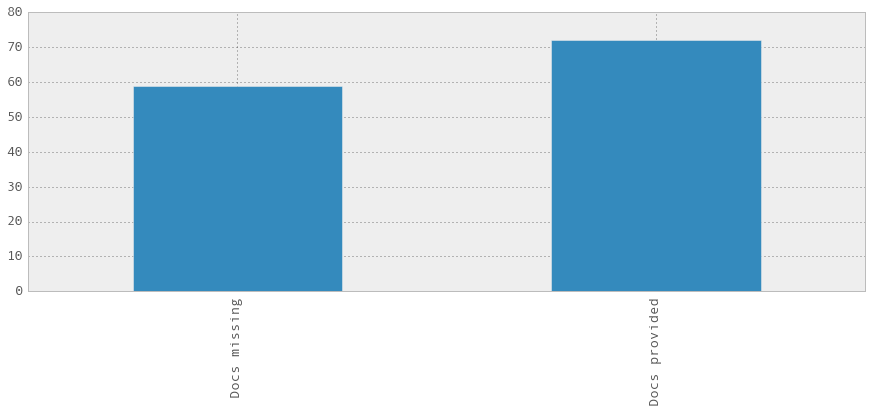

In [641]:
pd.DataFrame({
        "Docs provided":elixirTools.docs.notnull().sum(),
        "Docs missing":elixirTools.docs.isnull().sum()
             }, index=[0]
            ).sum().plot('bar')
            

User interfaces - webtools dominate

In [644]:
interface=pd.concat(
    [pd.DataFrame(x[0],index=[0],columns=x[0].keys()) for x in elixirTools.interface ]
    ,ignore_index=True
)

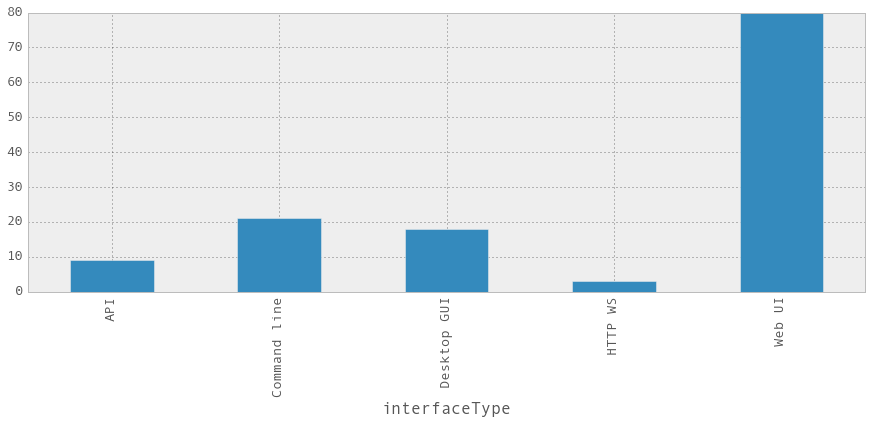

In [649]:
interface.groupby('interfaceType').aggregate('size').plot('bar')

#### References to the tool

In [692]:
pubs=pd.DataFrame([x for x in elixirTools.publications], index=elixirTools.name)

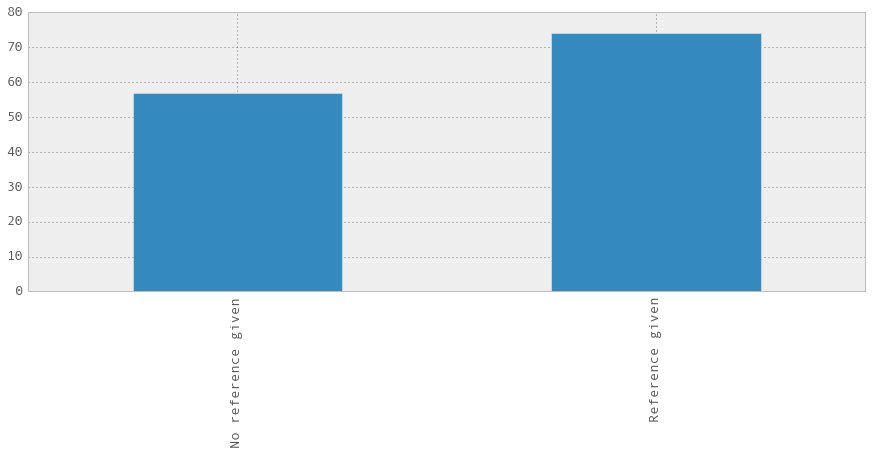

In [706]:
pd.DataFrame(
    {'Reference given':pubs[pubs.publicationsPrimaryID!='None'].shape[0],
     'No reference given':pubs[pubs.publicationsPrimaryID=='None'].shape[0]
     }, index=[0]).sum().plot('bar')

However where there is a reference given the format of the reference is very variable and requires heuristics to resolve. Perhaps add another key to the dictionary for ePMC / PM identifier and doi?

In [694]:
pubs

,publicationsOtherID,publicationsPrimaryID
name,,
CoNet,[22796884],22807668
InterPro,NaN,None
Gene ontology,NaN,None
Pfam protein domain database,NaN,None
UniProt Archive,NaN,None
European genome-phenome Archive EGA,NaN,None
BioModels database of annotated published models,NaN,None
Reactome knowledgebase of biological pathways,NaN,None
PRIDE proteomics identifications database,NaN,None


#### And given the reference we can retrieve the citations

Citation counter using ePMC restful API

_this is a bit of a quick hack but does the job. Note the regex branching to deal with PMID or DOI as publication identifier. It would be nice with 2 fields..._

In [754]:
def citationCount(ref):
    pmid=re.compile(r'\d{8,8}')
    doi=re.compile(r'10\.\d{4,4}\S+')
    pmcsearch='http://www.ebi.ac.uk/europepmc/webservices/rest/search?'
    m1=pmid.search(ref)
    m2=doi.search(ref)
    if m1: #matching a PMID
        qstring='query=%28EXT_ID:"'+m1.group()+'"%29&format=json'
        qparam=pmcsearch+qstring
        r=requests.get(qparam)
        if r.status_code ==200 :
            art=json.loads(r.text)
            try:
                return(int(art['resultList']['result'][0]['citedByCount']))
            except:
                print (art)
                return None
    elif m2: 
        #print (ref, 'doi', m2.group())
        qstring='query=%28DOI:"'+m2.group()+'"%29&format=json'
        qparam=pmcsearch+qstring
        r=requests.get(qparam)
        if r.status_code ==200 :
            art=json.loads(r.text)
            try:
                return(int(art['resultList']['result'][0]['citedByCount']))
            except:
                print (art)
                return None
        else:
            return 0 
        


Retrieve citations from ePMC webservices, for records that fail we simply echo the JSON header...

In [769]:
cit=pd.DataFrame([citationCount(x) for x in pubs.publicationsPrimaryID], columns=['Citations'], index=pubs.index)

{'version': '4.5.0', 'hitCount': 0, 'resultList': {'result': []}, 'request': {'page': 1, 'resultType': 'lite', 'query': '(DOI:"10.1016/j.cpc.2015.08.037")', 'pageSize': 25, 'synonym': False}}
{'version': '4.5.0', 'hitCount': 0, 'resultList': {'result': []}, 'request': {'page': 1, 'resultType': 'lite', 'query': '(DOI:"10.4172/jpb.1000292")', 'pageSize': 25, 'synonym': False}}
{'version': '4.5.0', 'hitCount': 0, 'resultList': {'result': []}, 'request': {'page': 1, 'resultType': 'lite', 'query': '(EXT_ID:"02614312")', 'pageSize': 25, 'synonym': False}}
{'version': '4.5.0', 'hitCount': 0, 'resultList': {'result': []}, 'request': {'page': 1, 'resultType': 'lite', 'query': '(DOI:"10.1093/")', 'pageSize': 25, 'synonym': False}}
{'version': '4.5.0', 'hitCount': 0, 'resultList': {'result': []}, 'request': {'page': 1, 'resultType': 'lite', 'query': '(DOI:"10.1186/s13059-014-0550-8")', 'pageSize': 25, 'synonym': False}}


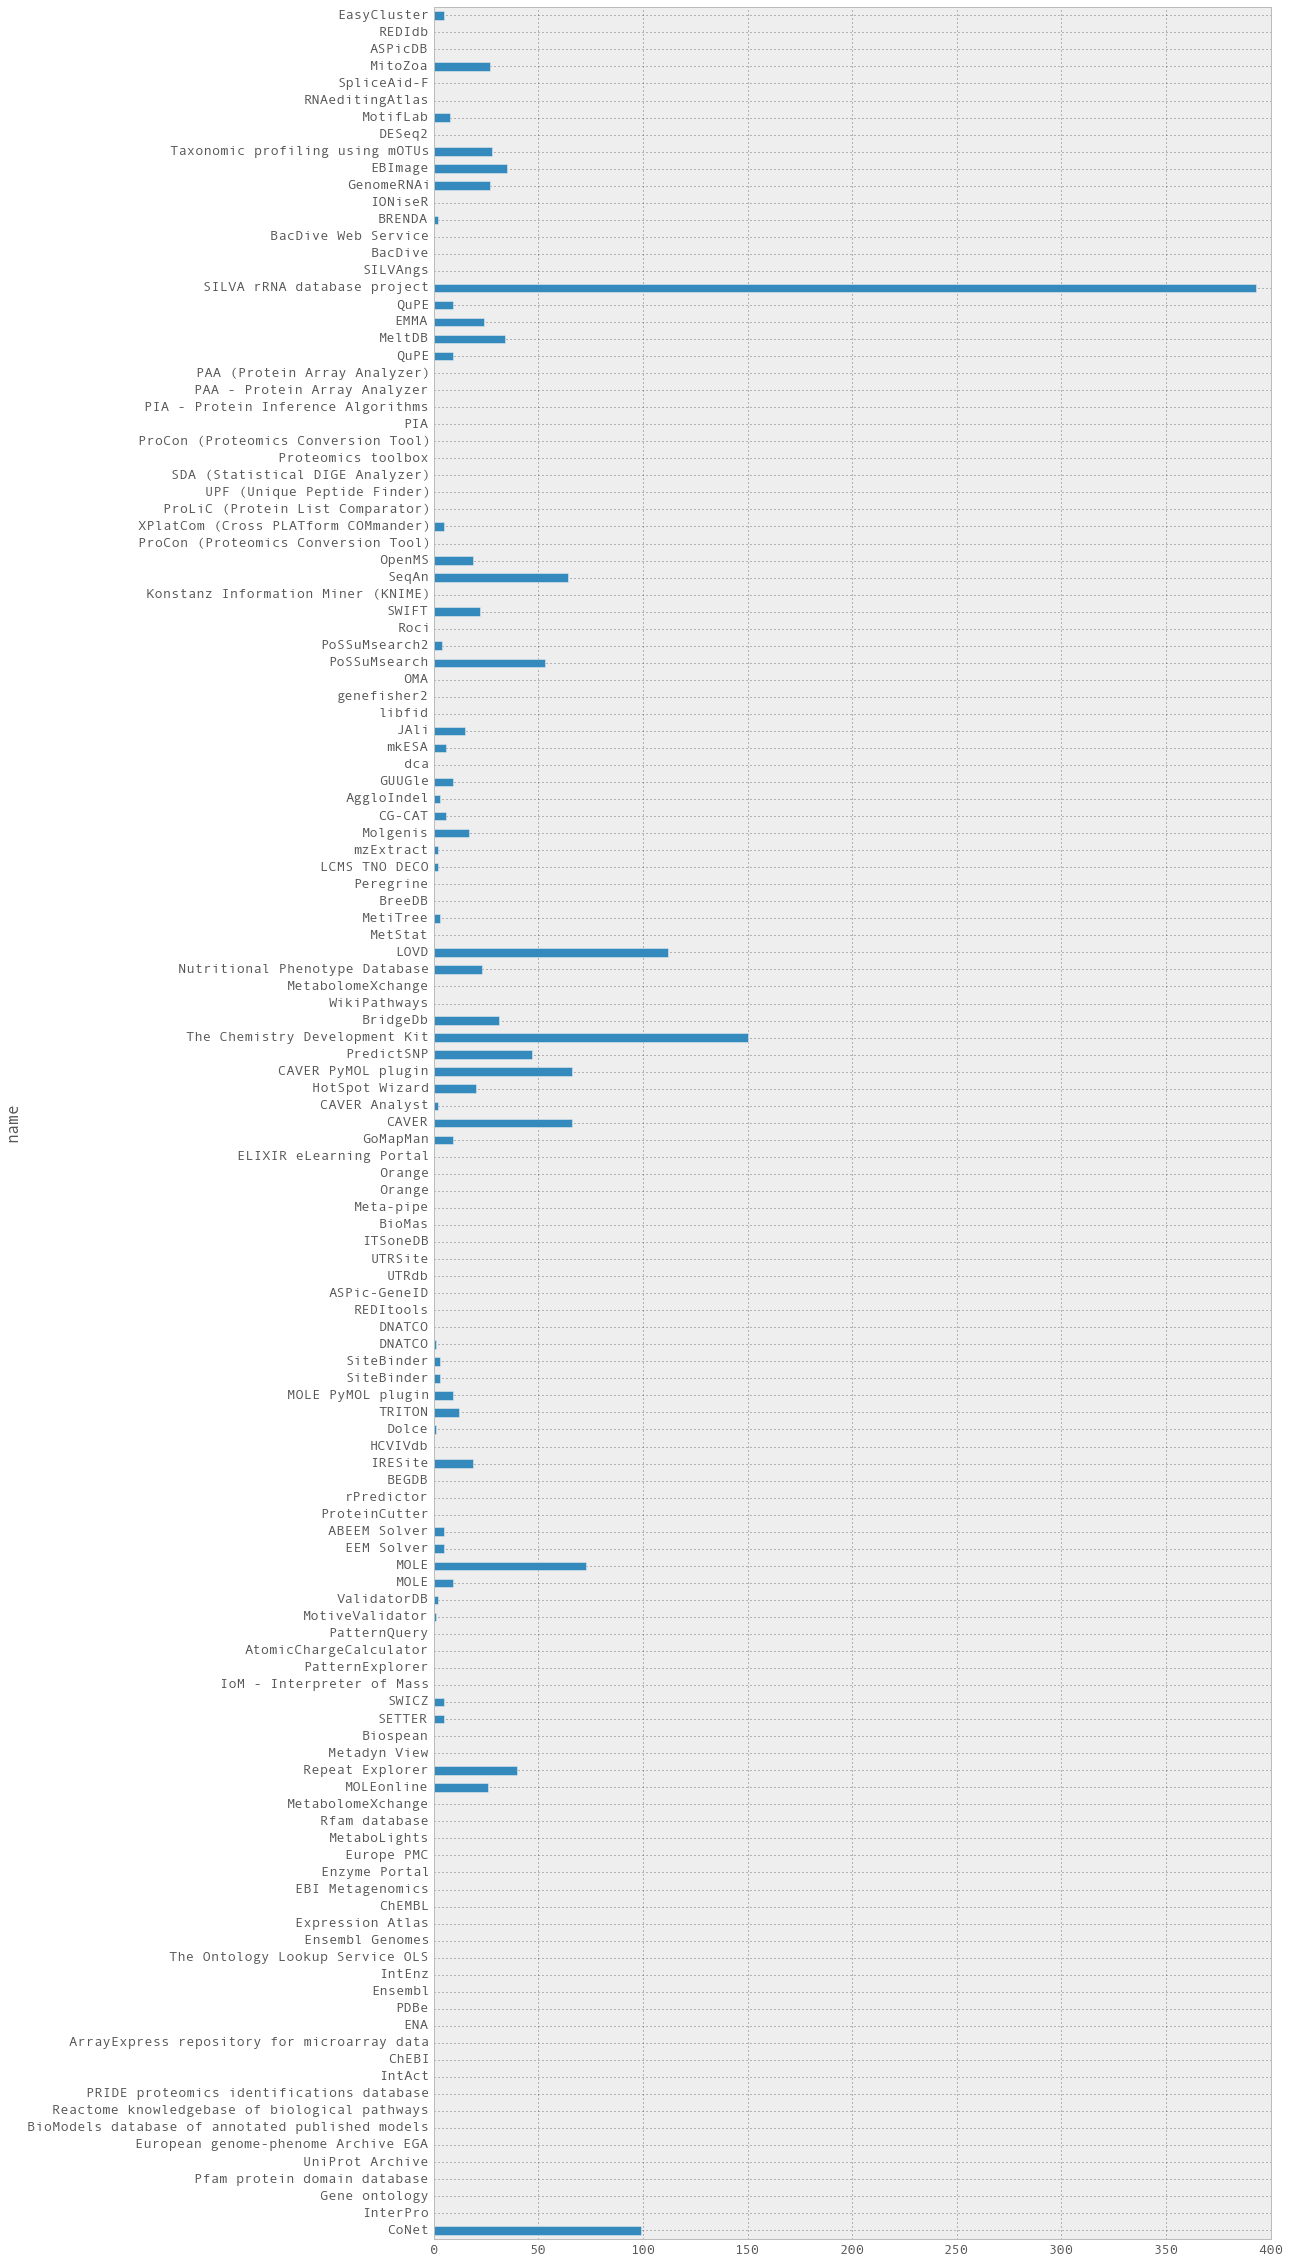

In [783]:
pylab.rcParams['figure.figsize'] = 15,40
cit.sum('columns').plot('barh')
pylab.rcParams['figure.figsize'] = 15,5

Obviously most of the _Null_ values are missing references